In [1]:
import os
import shutil
import random


In [2]:
# Paths for the dataset
base_dir = '/kaggle/input/stegoimagesdataset/train/train'  # Path to your dataset
clean_dir = os.path.join(base_dir, 'clean')  # Clean images folder
stego_dir = os.path.join(base_dir, 'stego')  # Stego images folder

# Paths for the reduced dataset
output_dir = '/kaggle/working/reduced_dataset'  # Path to save the reduced dataset
clean_output_dir = os.path.join(output_dir, 'clean')  # Output for clean images
stego_output_dir = os.path.join(output_dir, 'stego')  # Output for stego images

# Create output directories
os.makedirs(clean_output_dir, exist_ok=True)
os.makedirs(stego_output_dir, exist_ok=True)


In [3]:
def create_reduced_dataset(clean_dir, stego_dir, clean_output_dir, stego_output_dir, num_clean):
    # Get all clean images
    clean_images = sorted(os.listdir(clean_dir))  # Sort for consistent order
    sampled_clean_images = random.sample(clean_images, num_clean)  # Randomly select clean images

    for clean_image in sampled_clean_images:
        # Copy clean image
        shutil.copy(os.path.join(clean_dir, clean_image), os.path.join(clean_output_dir, clean_image))

        # Find and copy corresponding stego images
        clean_image_base = os.path.splitext(clean_image)[0]  # Get the base name of the clean image
        for stego_type in ['eth', 'html', 'url']:  # Adjust as needed for all types
            stego_image = f"image_{clean_image_base}_{stego_type}_0.png"
            stego_image_path = os.path.join(stego_dir, stego_image)
            if os.path.exists(stego_image_path):
                shutil.copy(stego_image_path, os.path.join(stego_output_dir, stego_image))
            else:
                print(f"Missing stego image: {stego_image_path}")

# Create the reduced dataset
create_reduced_dataset(clean_dir, stego_dir, clean_output_dir, stego_output_dir, num_clean=500)

print("Reduced dataset created successfully!")


Missing stego image: /kaggle/input/stegoimagesdataset/train/train/stego/image_00005_url_0.png
Missing stego image: /kaggle/input/stegoimagesdataset/train/train/stego/image_00947_url_0.png
Missing stego image: /kaggle/input/stegoimagesdataset/train/train/stego/image_01433_html_0.png
Missing stego image: /kaggle/input/stegoimagesdataset/train/train/stego/image_01433_url_0.png
Missing stego image: /kaggle/input/stegoimagesdataset/train/train/stego/image_03057_eth_0.png
Missing stego image: /kaggle/input/stegoimagesdataset/train/train/stego/image_03057_html_0.png
Missing stego image: /kaggle/input/stegoimagesdataset/train/train/stego/image_03091_eth_0.png
Missing stego image: /kaggle/input/stegoimagesdataset/train/train/stego/image_03091_html_0.png
Missing stego image: /kaggle/input/stegoimagesdataset/train/train/stego/image_01691_eth_0.png
Missing stego image: /kaggle/input/stegoimagesdataset/train/train/stego/image_00438_url_0.png
Missing stego image: /kaggle/input/stegoimagesdataset/tra

In [4]:
print(f"Number of clean images: {len(os.listdir(clean_output_dir))}")
print(f"Number of stego images: {len(os.listdir(stego_output_dir))}")


Number of clean images: 500
Number of stego images: 726


In [5]:
print("Sample clean images:", os.listdir(clean_output_dir)[:5])
print("Sample stego images:", os.listdir(stego_output_dir)[:5])


Sample clean images: ['01104.png', '03967.png', '00828.png', '01038.png', '01362.png']
Sample stego images: ['image_03948_url_0.png', 'image_02706_html_0.png', 'image_00924_html_0.png', 'image_00742_html_0.png', 'image_02234_html_0.png']


In [6]:
!zip -r /kaggle/working/reduced_dataset.zip /kaggle/working/reduced_dataset


  adding: kaggle/working/reduced_dataset/ (stored 0%)
  adding: kaggle/working/reduced_dataset/stego/ (stored 0%)
  adding: kaggle/working/reduced_dataset/stego/image_03948_url_0.png (deflated 36%)
  adding: kaggle/working/reduced_dataset/stego/image_02706_html_0.png (deflated 25%)
  adding: kaggle/working/reduced_dataset/stego/image_00924_html_0.png (deflated 21%)
  adding: kaggle/working/reduced_dataset/stego/image_00742_html_0.png (deflated 30%)
  adding: kaggle/working/reduced_dataset/stego/image_02234_html_0.png (deflated 27%)
  adding: kaggle/working/reduced_dataset/stego/image_00948_url_0.png (deflated 28%)
  adding: kaggle/working/reduced_dataset/stego/image_00683_url_0.png (deflated 50%)
  adding: kaggle/working/reduced_dataset/stego/image_00402_html_0.png (deflated 25%)
  adding: kaggle/working/reduced_dataset/stego/image_02946_eth_0.png (deflated 6%)
  adding: kaggle/working/reduced_dataset/stego/image_01986_html_0.png (deflated 23%)
  adding: kaggle/working/reduced_dataset/

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Paths to clean and stego images
clean_images = [os.path.join(clean_output_dir, img) for img in os.listdir(clean_output_dir)]
stego_images = [os.path.join(stego_output_dir, img) for img in os.listdir(stego_output_dir)]

# Create a DataFrame with file paths and labels
data = pd.DataFrame({
    'image_path': clean_images + stego_images,
    'label': [0] * len(clean_images) + [1] * len(stego_images)  # 0 for clean, 1 for stego
})

# Split into training, validation, and test sets
train_df, test_df = train_test_split(data, test_size=0.2, stratify=data['label'], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

print("Train size:", len(train_df))
print("Validation size:", len(val_df))
print("Test size:", len(test_df))


Train size: 784
Validation size: 196
Test size: 246


In [8]:
import tensorflow as tf

# Hyperparameters
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

def preprocess_image(image_path, label):
    # Load the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    # Resize and normalize
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

# Create TensorFlow datasets
def create_dataset(df):
    dataset = tf.data.Dataset.from_tensor_slices((df['image_path'].values, df['label'].values))
    dataset = dataset.map(preprocess_image).batch(BATCH_SIZE).shuffle(1000)
    return dataset

train_ds = create_dataset(train_df)
val_ds = create_dataset(val_df)
test_ds = create_dataset(test_df)


In [9]:
from tensorflow.keras import layers, models

def build_model():
    model = models.Sequential([
        layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # Explicit Input layer
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_model()
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
EPOCHS = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 191ms/step - accuracy: 0.5169 - loss: 0.7926 - val_accuracy: 0.5918 - val_loss: 0.6872
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5846 - loss: 0.6834 - val_accuracy: 0.5918 - val_loss: 0.6871
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5689 - loss: 0.6857 - val_accuracy: 0.5918 - val_loss: 0.6892
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6040 - loss: 0.6755 - val_accuracy: 0.5918 - val_loss: 0.6822
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5942 - loss: 0.6779 - val_accuracy: 0.5918 - val_loss: 0.6805
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6051 - loss: 0.6726 - val_accuracy: 0.5918 - val_loss: 0.6819
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5956 - loss: 0.6766 - val_accuracy: 0.5918 - val_loss: 0.6815
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6036 - loss: 0.6760 - val_accuracy: 0.5918 -

In [11]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.2f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6268 - loss: 0.7137 
Test Accuracy: 0.59


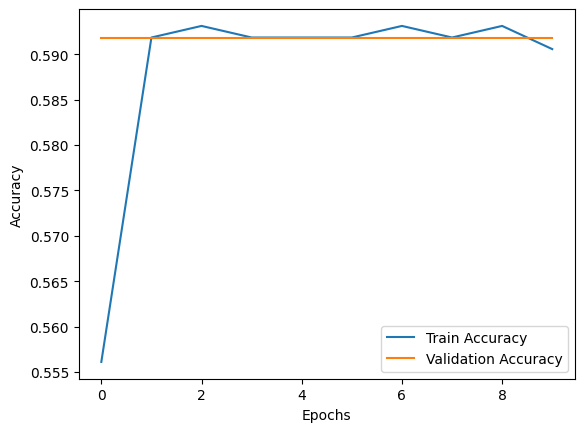

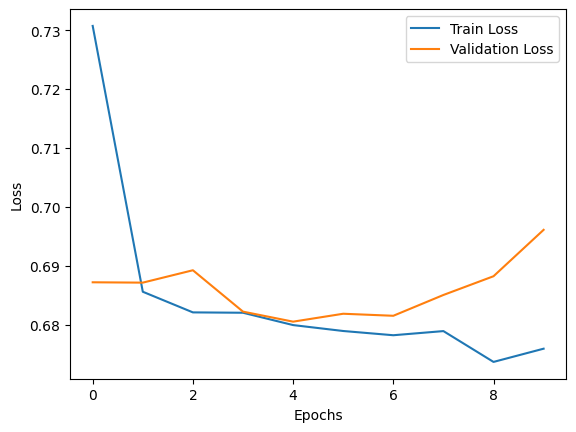

In [12]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [13]:
model.save('/kaggle/working/stego_vs_clean_model.h5')


In [14]:
import numpy as np

def extract_features(dataset):
    images, labels = [], []
    for image, label in dataset.unbatch():
        images.append(image.numpy().flatten())  # Flatten image into a 1D array
        labels.append(label.numpy())
    return np.array(images), np.array(labels)

# Extract features from training, validation, and test sets
X_train, y_train = extract_features(train_ds)
X_val, y_val = extract_features(val_ds)
X_test, y_test = extract_features(test_ds)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (784, 49152)
Validation data shape: (196, 49152)
Test data shape: (246, 49152)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [16]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

logistic_model = LogisticRegression(max_iter=5000)  # Increase max_iter
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

print("Logistic Regression Accuracy (Increased max_iter):", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy (Increased max_iter): 0.3821138211382114
              precision    recall  f1-score   support

           0       0.25      0.27      0.26       100
           1       0.48      0.46      0.47       146

    accuracy                           0.38       246
   macro avg       0.37      0.36      0.37       246
weighted avg       0.39      0.38      0.38       246



In [17]:
logistic_model = LogisticRegression(solver='saga', max_iter=1000)  # Use 'saga' solver
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

print("Logistic Regression Accuracy (saga solver):", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy (saga solver): 0.33739837398373984
              precision    recall  f1-score   support

           0       0.25      0.31      0.28       100
           1       0.43      0.36      0.39       146

    accuracy                           0.34       246
   macro avg       0.34      0.33      0.33       246
weighted avg       0.36      0.34      0.34       246



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [18]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=100)  # Reduce to 100 components
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Logistic Regression on PCA-transformed data
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train_pca, y_train)
y_pred_logistic = logistic_model.predict(X_test_pca)

print("Logistic Regression Accuracy (PCA):", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy (PCA): 0.4796747967479675
              precision    recall  f1-score   support

           0       0.34      0.30      0.32       100
           1       0.56      0.60      0.58       146

    accuracy                           0.48       246
   macro avg       0.45      0.45      0.45       246
weighted avg       0.47      0.48      0.47       246



In [19]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

KNN Accuracy: 0.3821138211382114
              precision    recall  f1-score   support

           0       0.14      0.10      0.12       100
           1       0.48      0.58      0.53       146

    accuracy                           0.38       246
   macro avg       0.31      0.34      0.32       246
weighted avg       0.34      0.38      0.36       246

Decision Tree Accuracy: 0.4715447154471545
              precision    recall  f1-score   support

           0       0.29      0.20      0.24       100
           1       0.55      0.66      0.60       146

    accuracy                           0.47       246
   macro avg       0.42      0.43      0.42       246
weighted avg       0.44      0.47      0.45       246



In [20]:
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [
    accuracy_score(y_test, y_pred_logistic),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_tree)
]

for model, acc in zip(models, accuracies):
    print(f"{model}: {acc:.2f}")

Logistic Regression: 0.48
KNN: 0.38
Decision Tree: 0.47


In [21]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier  # Requires `xgboost` package
from lightgbm import LGBMClassifier  # Requires `lightgbm` package


In [22]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.3902439024390244
              precision    recall  f1-score   support

           0       0.21      0.18      0.19       100
           1       0.49      0.53      0.51       146

    accuracy                           0.39       246
   macro avg       0.35      0.36      0.35       246
weighted avg       0.37      0.39      0.38       246



In [23]:
xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, use_label_encoder=False)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.3943089430894309
              precision    recall  f1-score   support

           0       0.22      0.20      0.21       100
           1       0.49      0.53      0.51       146

    accuracy                           0.39       246
   macro avg       0.36      0.36      0.36       246
weighted avg       0.38      0.39      0.39       246



In [24]:
lgbm_model = LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
lgbm_model.fit(X_train_scaled, y_train)
y_pred_lgbm = lgbm_model.predict(X_test_scaled)

print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 464, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.916728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4965482
[LightGBM] [Info] Number of data points in the train set: 784, number of used features: 46778
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.591837 -> initscore=0.371564
[LightGBM] [Info] Start training from score 0.371564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [25]:
ensemble_model = VotingClassifier(
    estimators=[
        ('RandomForest', rf_model),
        ('XGBoost', xgb_model),
        ('LightGBM', lgbm_model)
    ],
    voting='soft'  # Use 'soft' for probabilistic voting
)
ensemble_model.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

print("Ensemble (Soft Voting) Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print(classification_report(y_test, y_pred_ensemble))


[LightGBM] [Info] Number of positive: 464, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.966037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4965482
[LightGBM] [Info] Number of data points in the train set: 784, number of used features: 46778
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.591837 -> initscore=0.371564
[LightGBM] [Info] Start training from score 0.371564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [28]:
ensemble_model = VotingClassifier(
    estimators=[
        ('RandomForest', rf_model),
        ('XGBoost', xgb_model),
        ('LightGBM', lgbm_model)
    ],
    voting='soft',
    weights=[1, 2, 2]  # Give higher weight to better-performing models
)
ensemble_model.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

print("Weighted Ensemble Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print(classification_report(y_test, y_pred_ensemble))


[LightGBM] [Info] Number of positive: 464, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.968353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4965482
[LightGBM] [Info] Number of data points in the train set: 784, number of used features: 46778
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.591837 -> initscore=0.371564
[LightGBM] [Info] Start training from score 0.371564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [29]:
models = ['Random Forest', 'XGBoost', 'LightGBM', 'Ensemble']
accuracies = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_lgbm),
    accuracy_score(y_test, y_pred_ensemble)
]

for model, acc in zip(models, accuracies):
    print(f"{model} Accuracy: {acc:.2f}")


Random Forest Accuracy: 0.39
XGBoost Accuracy: 0.39
LightGBM Accuracy: 0.39
Ensemble Accuracy: 0.38
